In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [25]:
speciesNS = pd.read_excel('speciesNS.xlsx')
speciesGZ = pd.read_excel('speciesGZ.xlsx')
speciesNH = pd.read_excel('speciesNH.xlsx')
speciesDG = pd.read_excel('speciesDG.xlsx')

In [46]:
file_path = "/Users/hrd/Documents/data/全国空气质量/站点_20140513-20141231/filename.log"

with open(file_path, "r") as file:
        content = file.read()
        #print(content)

In [47]:
import os
import pandas as pd

directory_path = "/Users/hrd/Documents/data/全国空气质量/站点_20140513-20141231/"
data = []

# List all files in the directory
for file_name in os.listdir(directory_path):
    if file_name.endswith(".csv"):  # Assuming the files are CSV files
        file_path = os.path.join(directory_path, file_name)
        data.append(pd.read_csv(file_path))

In [48]:
# delect the cites in PRD region only
# column: 344 - 400
# 1345A - 1400A

prd = []

for i in range(len(data)):
    prd.append(data[i].iloc[:,344:400])

In [49]:
#replace the nan values with 0

for i in range(len(prd)):
    prd[i].fillna(0,inplace=True)

In [50]:
Type = []
date = []
hour = []


for i in range(len(data)):
    Type.append(data[i].iloc[:,2].tolist())
    date.append(data[i].iloc[:,0].tolist())
    hour.append(data[i].iloc[:,1].tolist())

In [51]:
# add 'date', 'hour', 'type' as columns to prd

for i in range(len(prd)):
    prd[i]['date'] = date[i]
    prd[i]['hour'] = hour[i]
    prd[i]['type'] = Type[i]

In [52]:
# Assuming 'prd' is a list of DataFrames
# filter all rows with PM2.5 only

filtered = [df.loc[df['type'] == 'PM2.5'] for df in prd]

In [53]:
# Assuming 'filtered' is a list of DataFrames containing data for the whole year
daily_averages = []

for df in filtered:
    daily_avg = df.iloc[:, :-2].mean()  # Calculate column averages for the first 56 columns
    #print(daily_avg)
    daily_averages.append(daily_avg)

# Create the 'daily' DataFrame by concatenating the averages
daily = pd.concat(daily_averages, axis=1).T

# Set column names for the 'daily' DataFrame
#daily.columns = [f'Column_{i+1}_avg' for i in range(57)]

In [18]:
daily

,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,1353A,1354A,...,1392A,1393A,1394A,1395A,1396A,1397A,1398A,1399A,1400A,date
0,22.727273,35.409091,21.000000,19.863636,23.181818,22.772727,26.590909,21.045455,24.863636,20.136364,...,22.045455,18.045455,21.227273,22.545455,20.409091,21.545455,22.136364,17.090909,0.0,20150224.0
1,47.291667,58.958333,48.833333,50.083333,54.833333,45.750000,52.208333,43.666667,52.500000,37.708333,...,45.125000,40.000000,45.875000,41.916667,38.375000,58.000000,57.708333,63.708333,0.0,20150218.0
2,31.904762,35.523810,0.000000,29.095238,41.523810,36.000000,50.904762,31.428571,50.333333,34.142857,...,29.380952,23.000000,24.714286,19.571429,21.476190,91.952381,75.619048,74.142857,0.0,20151106.0
3,49.458333,59.958333,0.000000,52.375000,55.833333,65.375000,27.625000,47.416667,40.833333,43.416667,...,53.041667,45.250000,46.833333,28.625000,30.166667,47.875000,44.000000,35.875000,0.0,20151112.0
4,16.750000,20.937500,0.000000,12.125000,16.312500,20.687500,19.812500,22.937500,24.812500,15.312500,...,9.187500,9.375000,12.125000,5.687500,8.312500,30.000000,32.000000,11.750000,0.0,20150620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,23.318182,26.772727,0.000000,18.909091,23.590909,27.772727,19.181818,29.590909,27.272727,17.545455,...,18.727273,19.227273,17.272727,11.500000,11.863636,21.181818,25.954545,16.727273,0.0,20150605.0
360,19.521739,19.043478,0.000000,17.826087,19.304348,26.826087,23.826087,26.347826,23.217391,16.826087,...,16.434783,30.521739,16.782609,14.478261,13.521739,22.000000,24.000000,28.695652,0.0,20150611.0
361,84.125000,89.041667,46.750000,78.000000,76.458333,88.708333,68.541667,79.875000,82.583333,68.625000,...,49.291667,35.166667,42.166667,43.916667,38.958333,102.625000,100.083333,86.625000,0.0,20150215.0
362,46.375000,47.458333,40.625000,42.375000,40.833333,54.083333,35.000000,38.833333,38.083333,34.125000,...,36.458333,29.666667,29.083333,37.000000,35.166667,39.291667,43.208333,38.875000,0.0,20150201.0


the dates don't seem alright

In [54]:
# Assuming 'daily' is a DataFrame with 365 rows * 57 columns, where each row represents data for one day
month = daily

# Calculate the monthly average for each column
month['Date'] = pd.to_datetime(daily['date'],format='%Y%m%d')  # Convert the 'Date' column to datetime
month.set_index('Date', inplace=True)  # Set the 'Date' column as the index
monthly = month.resample('M').mean()  # Calculate the monthly average

# Ensure 'monthly' has exactly 12 rows and 57 columns
monthly = monthly.head(12)

# Reset index to have a separate column for the datetime index
monthly.reset_index(inplace=True)

# Print the shape of the 'monthly' DataFrame
print(monthly.shape)

(8, 58)


In [55]:
Day = monthly['Date'].tolist()
Day

[Timestamp('2014-05-31 00:00:00'),
 Timestamp('2014-06-30 00:00:00'),
 Timestamp('2014-07-31 00:00:00'),
 Timestamp('2014-08-31 00:00:00'),
 Timestamp('2014-09-30 00:00:00'),
 Timestamp('2014-10-31 00:00:00'),
 Timestamp('2014-11-30 00:00:00'),
 Timestamp('2014-12-31 00:00:00')]

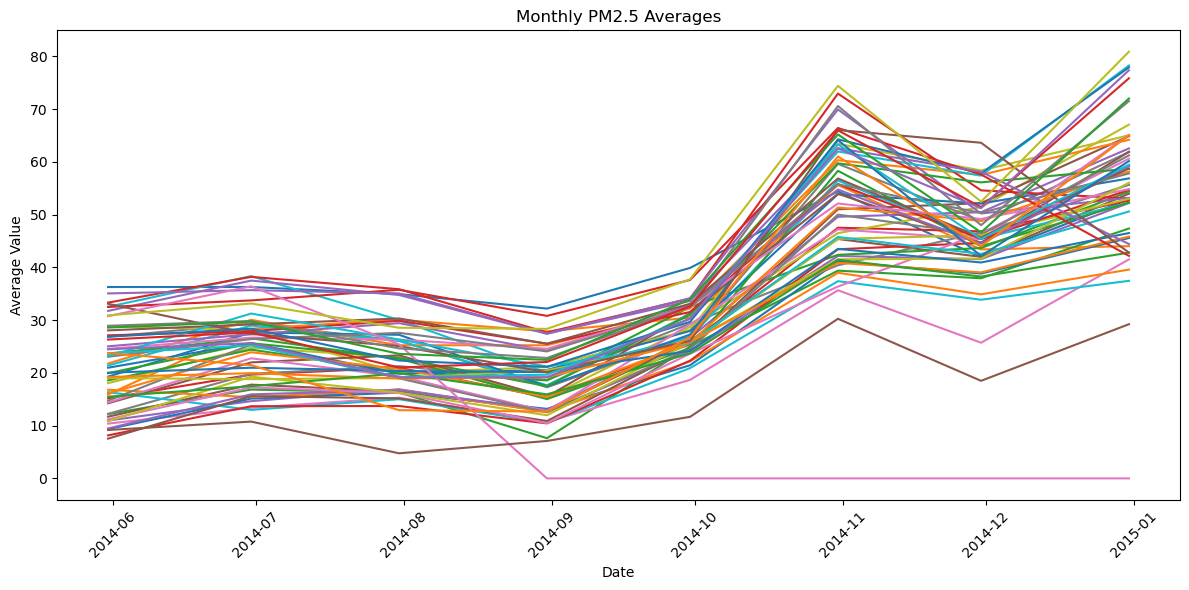

In [56]:
# Plotting the monthly averages
plt.figure(figsize=(12, 6))
for column in monthly.columns[1:-1]:  # Exclude the Date column
    plt.plot(monthly['Date'], monthly[column], label=column)

plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Monthly PM2.5 Averages')
#plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [59]:
monthly

,Date,1354A,1355A,1356A,1357A,1358A,1359A,1360A,1361A,1362A,...,1401A,1402A,1403A,1404A,1405A,1406A,1408A,1407A,1409A,date
0,2014-05-31,36.283170,15.918325,12.190428,15.182031,10.965317,11.697646,10.384371,12.233933,18.058463,...,28.933570,30.901187,23.726334,26.857112,23.769323,28.593991,26.318115,24.463668,9.176448,2.014052e+07
1,2014-06-30,36.283528,28.367283,16.841322,19.674533,14.641793,17.773257,13.387823,19.831988,24.779698,...,29.847029,33.156682,25.199608,28.385144,21.468598,29.703967,27.672546,25.643016,10.766916,2.014062e+07
2,2014-07-31,34.932078,30.083541,16.286379,20.991434,16.900661,16.487169,15.298492,21.275957,22.943328,...,24.643261,28.557164,19.200052,22.339034,12.929709,23.608623,21.020467,19.145083,4.754117,2.014071e+07
3,2014-08-31,32.190600,27.864056,7.617111,15.349616,12.659479,12.887081,10.717094,18.644832,15.333312,...,22.825513,28.351316,19.650814,21.145283,12.670109,22.466589,22.064867,19.155962,7.098719,2.014082e+07
4,2014-09-30,39.904046,30.477053,24.993237,25.419626,24.135749,26.091063,18.673973,29.318297,28.723188,...,32.650966,37.743478,30.271135,29.683454,26.740097,33.931220,32.622343,30.282428,11.670290,2.014092e+07
5,2014-10-31,54.416208,55.623415,39.384631,47.525089,42.166090,45.384712,35.668300,40.403611,46.492506,...,70.596932,74.423569,63.330273,64.123953,61.030486,65.216736,65.983469,62.571873,30.258674,2.014102e+07
6,2014-11-30,41.913249,43.408301,37.942504,46.839190,41.560543,41.995965,25.721523,46.678527,51.432312,...,48.009122,52.466131,45.395247,42.168332,43.992956,46.640057,51.431390,51.233968,18.495986,2.014112e+07
7,2014-12-31,52.940554,44.030031,47.378162,52.645469,52.219743,53.980342,41.523795,55.655258,67.068268,...,71.544202,80.902036,59.464837,60.159790,65.065982,72.026897,75.859985,77.390796,29.232756,2.014122e+07


In [63]:
speciesGZ.iloc[-20:-12]

,Unnamed: 0,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,Aluminum,...,T Mass,Al,Si,Mn,Fe,PM2.5,S/SO4,Na,Trace_Element,MD
88,201405,NaN,4.798042,0.586885,1.464494,6.661849,7.505037,10.780549,2.510648,NaN,...,NaN,NaN,NaN,NaN,NaN,38.656155,0.380041,NaN,NaN,0.616982
89,201406,NaN,2.531588,0.402807,0.578779,2.277408,6.420544,8.284549,1.812889,NaN,...,NaN,NaN,NaN,NaN,NaN,25.644110,0.424174,NaN,NaN,0.517813
90,201407,NaN,3.920903,0.437184,0.415374,2.590151,9.104936,10.462607,1.642522,NaN,...,NaN,NaN,NaN,NaN,NaN,33.605125,0.448184,NaN,NaN,0.575053
91,201408,NaN,2.979394,0.440466,0.435393,2.339620,6.833613,9.249862,1.772788,NaN,...,NaN,NaN,NaN,NaN,NaN,26.315104,0.415370,NaN,NaN,0.569094
92,201409,NaN,3.465779,0.332685,0.239514,1.674125,8.213474,8.518464,1.218043,NaN,...,NaN,NaN,NaN,NaN,NaN,27.106242,0.421929,NaN,NaN,0.430191
93,201410,NaN,6.620171,0.673890,0.389963,3.575575,15.184187,13.809847,1.481456,NaN,...,NaN,NaN,NaN,NaN,NaN,49.939682,0.432650,NaN,NaN,0.894103
94,201411,NaN,7.170136,0.706287,1.162819,6.697879,13.155686,14.968264,1.983552,NaN,...,NaN,NaN,NaN,NaN,NaN,52.800330,0.406969,NaN,NaN,0.900660
95,201412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


Text(0, 0.5, 'MEE')

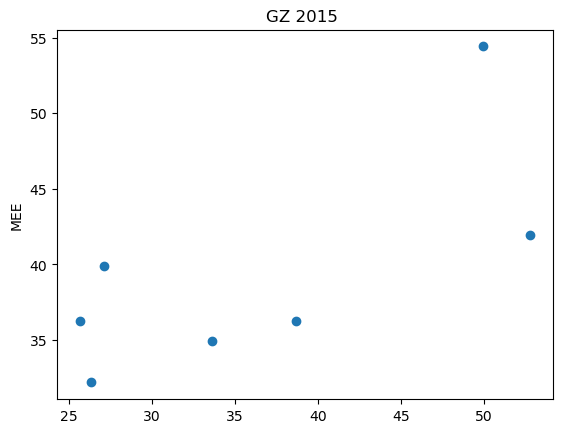

In [64]:
plt.scatter(speciesGZ['PM2.5'][-20:-12],monthly['1354A'])
plt.title('GZ 2015 ')
plt.ylabel('MEE')

Text(0, 0.5, 'MEE')

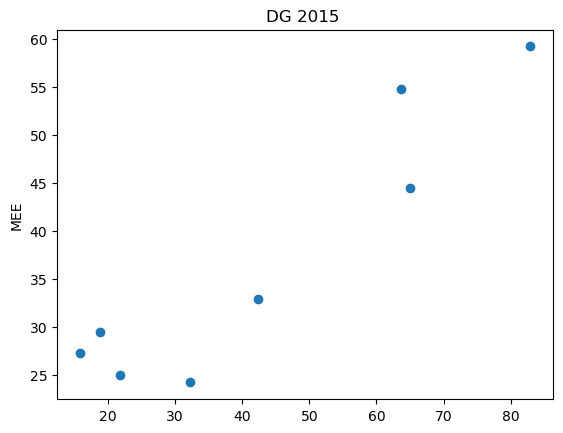

In [65]:
plt.scatter(speciesDG['Teflon Mass'][-20:-12],monthly['1388A'])
plt.title('DG 2015 ')
plt.ylabel('MEE')

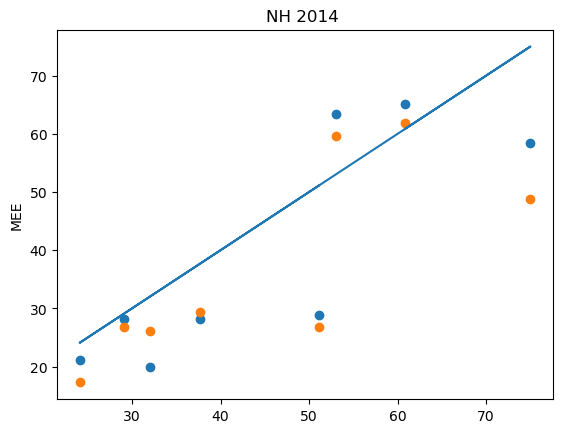

In [71]:
plt.scatter(speciesNH['Teflon Mass'][-20:-12],monthly['1372A'])
plt.scatter(speciesNH['Teflon Mass'][-20:-12],monthly['1371A'])
plt.title('NH 2014 ')
plt.ylabel('MEE')
#plt.plot(speciesNH['Teflon Mass'][-20:-12],speciesNH['Teflon Mass'][-20:-12])

In [68]:
speciesNH.iloc[-20:-12]

,Unnamed: 0,Teflon Mass,NH4+,K+,Cl-,NO3-,SO4=,OC_TOT,EC_TOT,K,...,Calcium,Manganese,Iron,Al,Si,Mn,Fe,PM2.5,Na,MD
76,201405,51.099454,4.133650,0.688123,1.606410,5.940905,7.920328,11.034073,3.123839,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77,201406,37.627473,3.608613,0.735553,1.239747,4.859998,7.557746,11.664681,2.879976,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
78,201407,32.089698,3.302106,0.463296,0.445767,1.583996,8.042944,9.728451,1.834342,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
79,201408,24.084464,2.314995,0.391722,0.458647,1.246365,5.390160,8.290509,1.676952,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
80,201409,29.136467,3.513163,0.440441,0.418364,1.951204,7.980718,8.763684,1.710426,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
81,201410,53.083096,7.890260,1.001529,0.776053,5.330903,17.134322,14.342323,2.119604,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
82,201411,75.001025,9.750771,1.305574,2.271815,13.354571,14.666364,20.494947,4.190748,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
83,201412,60.845031,8.380092,1.613360,2.857308,9.057640,14.407257,16.033149,4.089061,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [72]:
type(monthly)

pandas.core.frame.DataFrame

In [73]:
monthly.to_csv('MEE_2014.csv')#, index=False)

In [74]:
monthly

,Date,1354A,1355A,1356A,1357A,1358A,1359A,1360A,1361A,1362A,...,1401A,1402A,1403A,1404A,1405A,1406A,1408A,1407A,1409A,date
0,2014-05-31,36.283170,15.918325,12.190428,15.182031,10.965317,11.697646,10.384371,12.233933,18.058463,...,28.933570,30.901187,23.726334,26.857112,23.769323,28.593991,26.318115,24.463668,9.176448,2.014052e+07
1,2014-06-30,36.283528,28.367283,16.841322,19.674533,14.641793,17.773257,13.387823,19.831988,24.779698,...,29.847029,33.156682,25.199608,28.385144,21.468598,29.703967,27.672546,25.643016,10.766916,2.014062e+07
2,2014-07-31,34.932078,30.083541,16.286379,20.991434,16.900661,16.487169,15.298492,21.275957,22.943328,...,24.643261,28.557164,19.200052,22.339034,12.929709,23.608623,21.020467,19.145083,4.754117,2.014071e+07
3,2014-08-31,32.190600,27.864056,7.617111,15.349616,12.659479,12.887081,10.717094,18.644832,15.333312,...,22.825513,28.351316,19.650814,21.145283,12.670109,22.466589,22.064867,19.155962,7.098719,2.014082e+07
4,2014-09-30,39.904046,30.477053,24.993237,25.419626,24.135749,26.091063,18.673973,29.318297,28.723188,...,32.650966,37.743478,30.271135,29.683454,26.740097,33.931220,32.622343,30.282428,11.670290,2.014092e+07
5,2014-10-31,54.416208,55.623415,39.384631,47.525089,42.166090,45.384712,35.668300,40.403611,46.492506,...,70.596932,74.423569,63.330273,64.123953,61.030486,65.216736,65.983469,62.571873,30.258674,2.014102e+07
6,2014-11-30,41.913249,43.408301,37.942504,46.839190,41.560543,41.995965,25.721523,46.678527,51.432312,...,48.009122,52.466131,45.395247,42.168332,43.992956,46.640057,51.431390,51.233968,18.495986,2.014112e+07
7,2014-12-31,52.940554,44.030031,47.378162,52.645469,52.219743,53.980342,41.523795,55.655258,67.068268,...,71.544202,80.902036,59.464837,60.159790,65.065982,72.026897,75.859985,77.390796,29.232756,2.014122e+07
